In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib
from matplotlib.collections import EventCollection

## 设置matplotlib正常显示中文和负号

In [2]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号

## 直方图，散点图，折线图

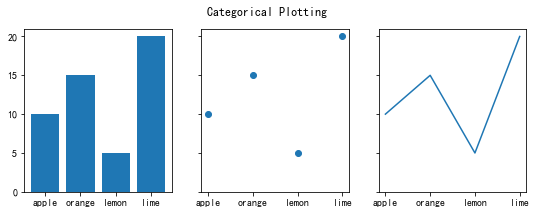

In [3]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

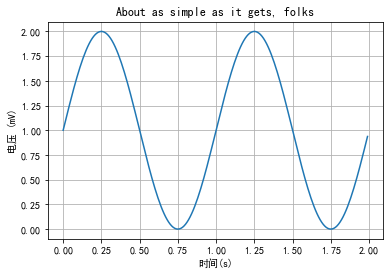

In [4]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='时间(s)', ylabel='电压 (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.svg")  # 保存svg格式不易失真
plt.show()

## Customizing dashed line styles

The dashing of a line is controlled via a dash sequence. It can be modified using Line2D.set_dashes.

The dash sequence is a series of on/off lengths in points, e.g. [3, 1] would be 3pt long lines separated by 1pt spaces.

Some functions like Axes.plot support passing Line properties as keyword arguments. In such a case, you can already set the dashing when creating the line.

Note: The dash style can also be configured via a property_cycle by passing a list of dash sequences using the keyword dashes to the cycler. This is not shown within this example.

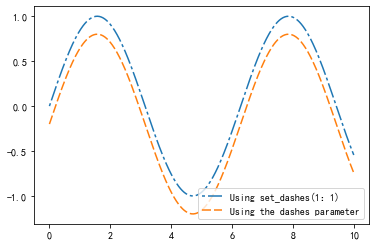

In [5]:
x = np.linspace(0, 10, 500)
y = np.sin(x)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes(1：1)')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()

## Stacked bar chart

This is an example of creating a stacked bar plot with error bars using bar. Note the parameters yerr used for error bars, and bottom to stack the women's bars on top of the men's bars.

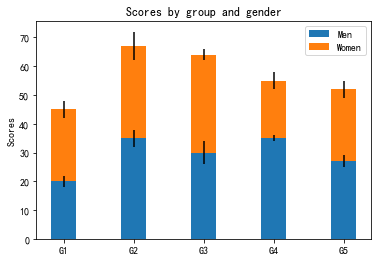

In [6]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

## Grouped bar chart with labels

This example shows a how to create a grouped bar chart and how to annotate bars with labels.

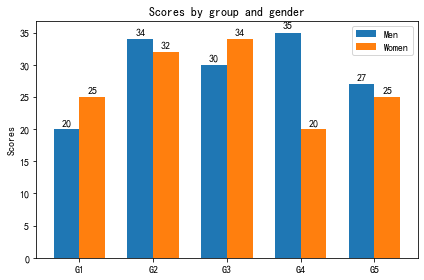

In [7]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

## Horizontal bar chart

This example showcases a simple horizontal bar chart.

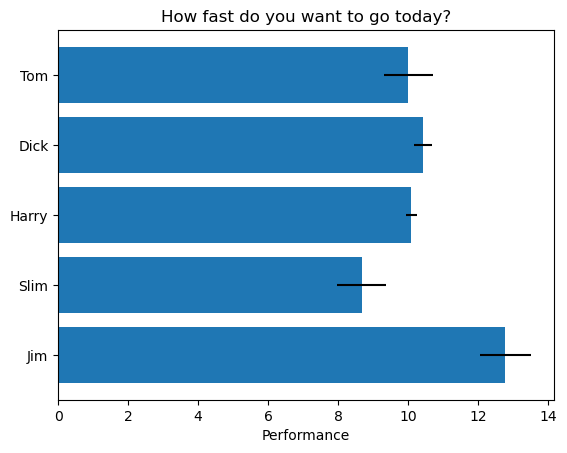

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

## Step Demo

This example demonstrates the use of pyplot.step for piece-wise constant curves. In particular, it illustrates the effect of the parameter where on the step position.

The circular markers created with pyplot.plot show the actual data positions so that it's easier to see the effect of where.

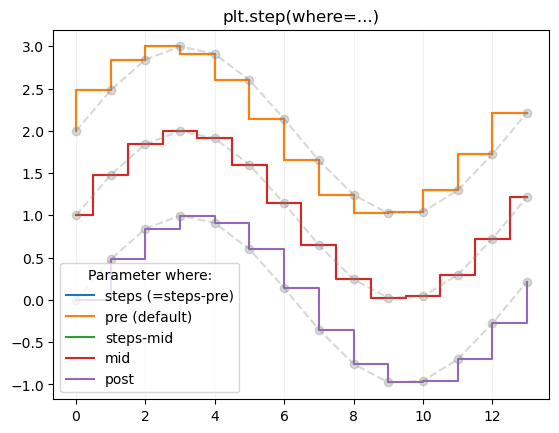

In [9]:
x = np.arange(14)
y = np.sin(x / 2)

plt.plot(x, y + 2, drawstyle='steps', label='steps (=steps-pre)')
plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.plot(x, y + 1, drawstyle='steps-mid', label='steps-mid')
plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

The same behavior can be achieved by using the drawstyle parameter of pyplot.plot.

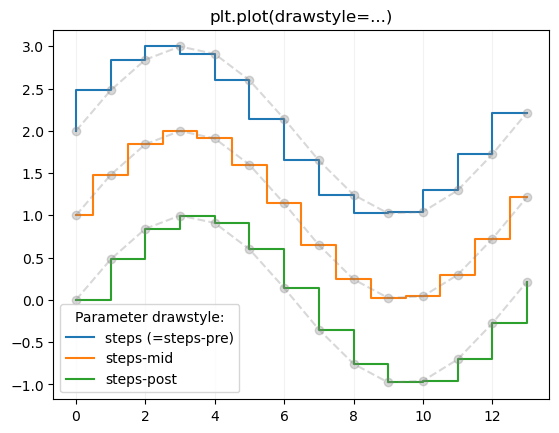

In [10]:
plt.plot(x, y + 2, drawstyle='steps', label='steps (=steps-pre)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.plot(x, y + 1, drawstyle='steps-mid', label='steps-mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.plot(x, y, drawstyle='steps-post', label='steps-post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter drawstyle:')
plt.title('plt.plot(drawstyle=...)')
plt.show()

## Scatter Custom Symbol

Creating a custom ellipse symbol in scatter plot.

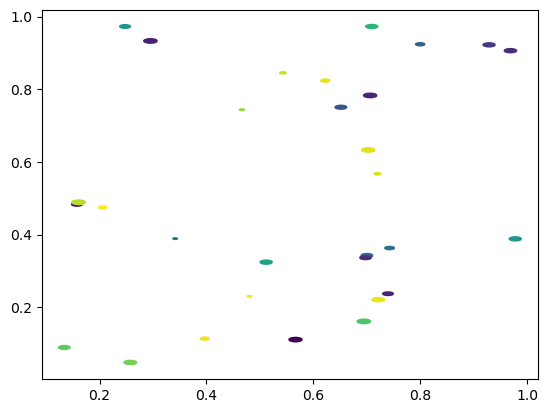

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# unit area ellipse
rx, ry = 3., 1.
area = rx * ry * np.pi
theta = np.arange(0, 2 * np.pi + 0.01, 0.1)
verts = np.column_stack([rx / area * np.cos(theta), ry / area * np.sin(theta)])

x, y, s, c = np.random.rand(4, 30)
s *= 10**2.

fig, ax = plt.subplots()
ax.scatter(x, y, s, c, marker=verts)

plt.show()

## Spectrum Representations

The plots show different spectrum representations of a sine signal with additive noise. A (frequency) spectrum of a discrete-time signal is calculated by utilizing the fast Fourier transform (FFT).

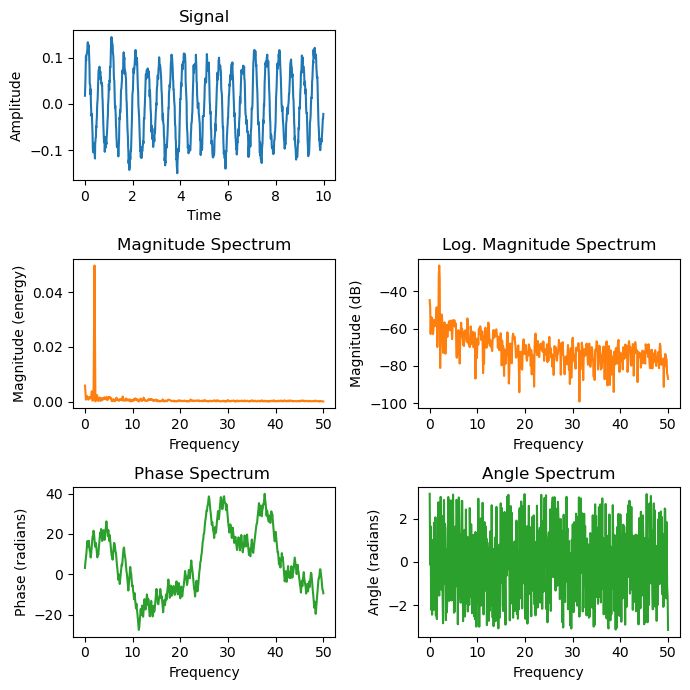

In [12]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()



## Markevery Demo

This example demonstrates the various options for showing a marker at a subset of data points using the markevery property of a Line2D object.

Integer arguments are fairly intuitive. e.g. markevery=5 will plot every 5th marker starting from the first data point.

Float arguments allow markers to be spaced at approximately equal distances along the line. The theoretical distance along the line between markers is determined by multiplying the display-coordinate distance of the axes bounding-box diagonal by the value of markevery. The data points closest to the theoretical distances will be shown.

A slice or list/array can also be used with markevery to specify the markers to show.

In [13]:
# define a list of markevery cases to plot
cases = [None,
         8,
         (30, 8),
         [16, 24, 30], [0, -1],
         slice(100, 200, 3),
         0.1, 0.3, 1.5,
         (0.0, 0.1), (0.45, 0.1)]

# define the figure size and grid layout properties
figsize = (10, 8)
cols = 3
rows = len(cases) // cols + 1
# define the data for cartesian plots
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta


def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

Plot each markevery case for linear x and y scales

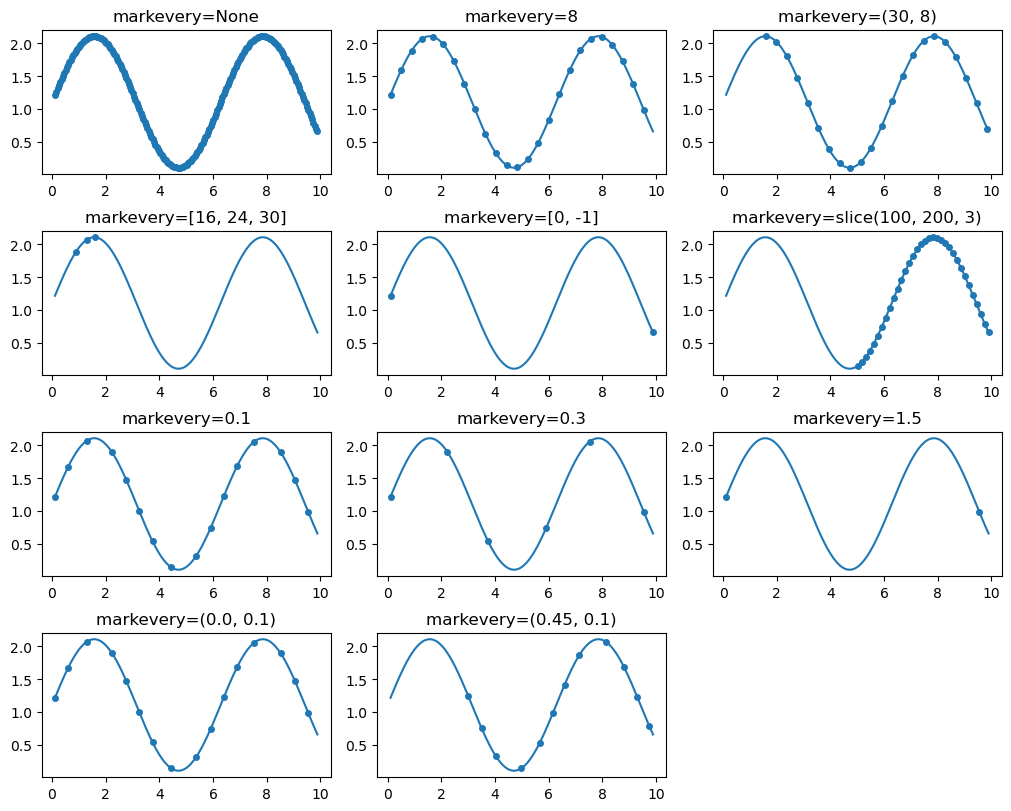

In [14]:
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)

Plot each markevery case for log x and y scales

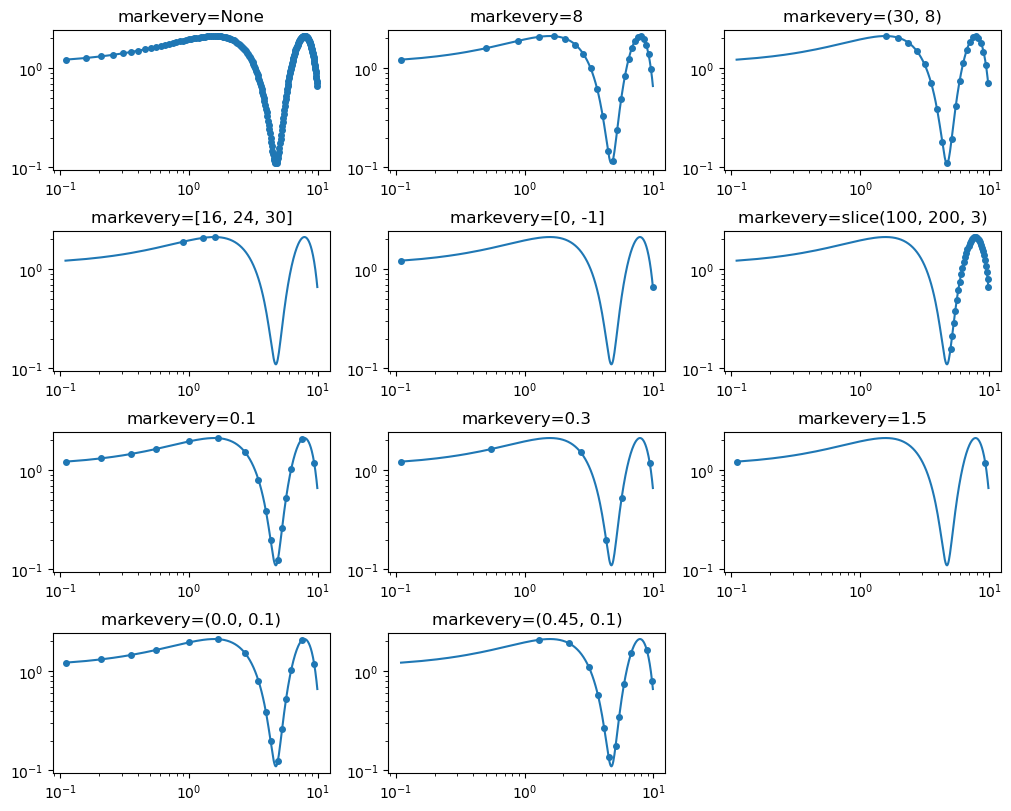

In [15]:
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)

Plot each markevery case for linear x and y scales but zoomed in note the behaviour when zoomed in. When a start marker offset is specified it is always interpreted with respect to the first data point which might be different to the first visible data point.

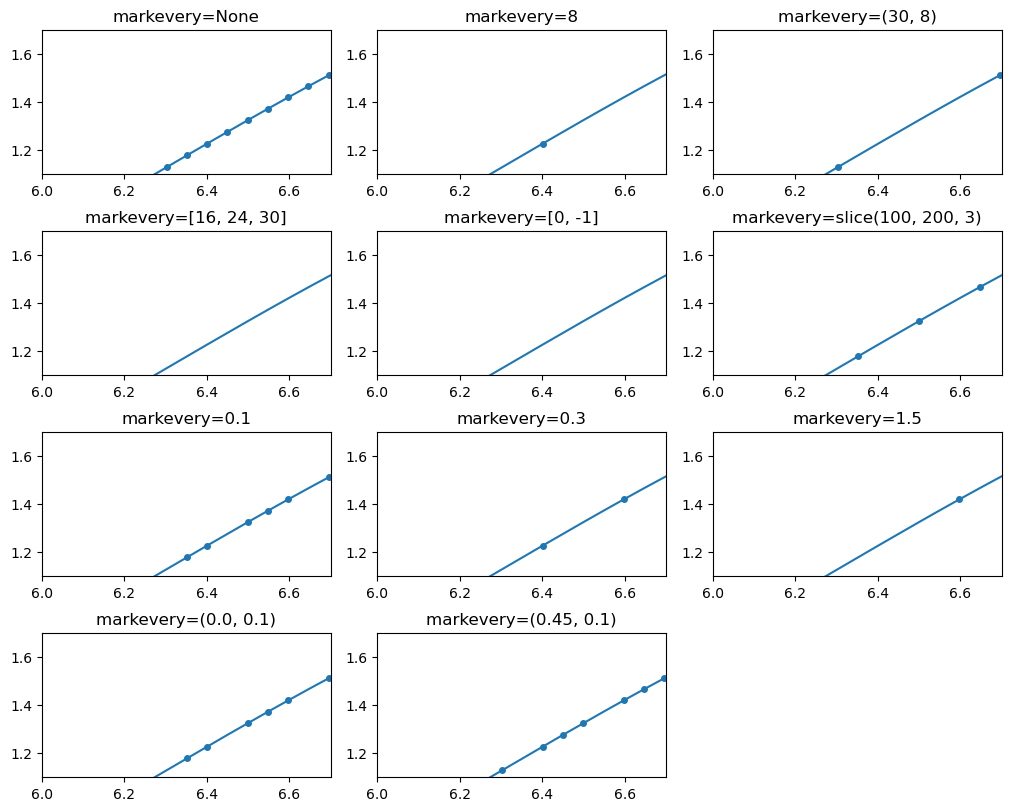

In [16]:
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)
    ax.set_xlim((6, 6.7))
    ax.set_ylim((1.1, 1.7))

# define data for polar plots
r = np.linspace(0, 3.0, 200)
theta = 2 * np.pi * r

Plot each markevery case for polar plots

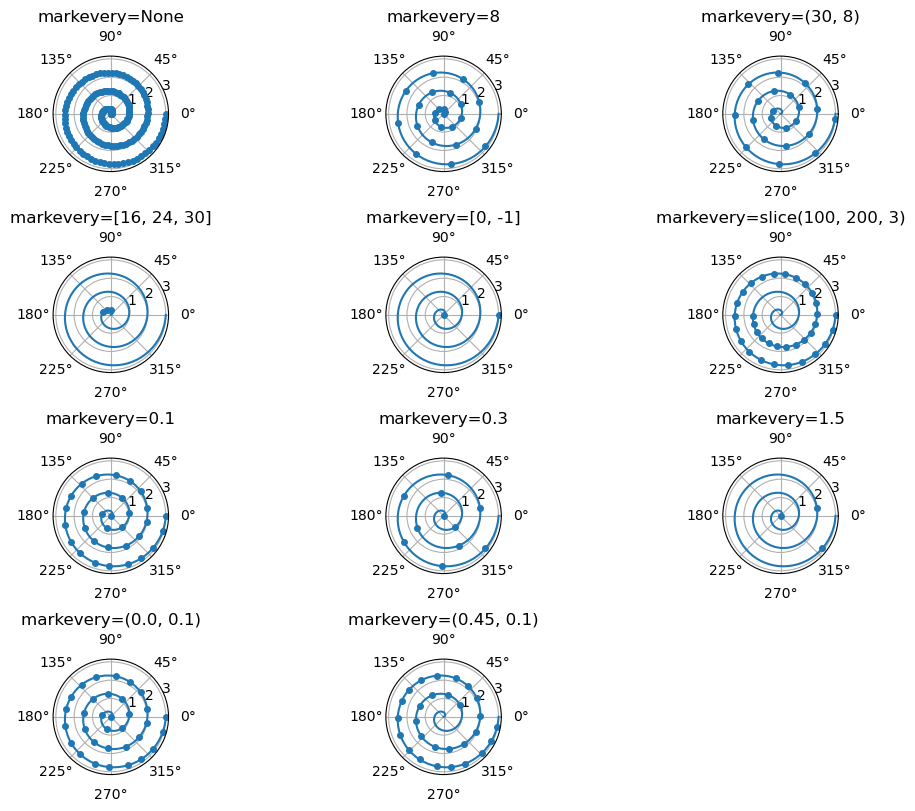

In [17]:
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(
    rows, cols, subplot_kw={'projection': 'polar'})
axs = trim_axs(axs, len(cases))
for ax, case in zip(axs, cases):
    ax.set_title('markevery=%s' % str(case))
    ax.plot(theta, r, 'o', ls='-', ms=4, markevery=case)

plt.show()